<a href="https://colab.research.google.com/github/naadir95/AutoML/blob/main/Diamond_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
#check the shape of data
dataset.shape

(6000, 8)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data used for Modelling: '+ str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data used for Modelling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [11]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [13]:
best = compare_models(sort = 'MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,762.0118,2.763999e+06,1612.2410,0.9729,0.0817,0.0607,1.305
rf,Random Forest Regressor,760.6304,2.929683e+06,1663.0148,0.9714,0.0818,0.0597,1.229
lightgbm,Light Gradient Boosting Machine,752.6446,3.056348e+06,1687.9907,0.9711,0.0773,0.0567,0.080
gbr,Gradient Boosting Regressor,920.2913,3.764304e+06,1901.1793,0.9633,0.1024,0.0770,0.272
dt,Decision Tree Regressor,1003.1237,5.305620e+06,2228.7271,0.9476,0.1083,0.0775,0.032
ridge,Ridge Regression,2413.5704,1.412049e+07,3726.1643,0.8621,0.6689,0.2875,0.017
lasso,Lasso Regression,2412.1922,1.424680e+07,3744.2305,0.8608,0.6767,0.2866,0.037
br,Bayesian Ridge,2415.8031,1.427077e+07,3746.9951,0.8606,0.6696,0.2873,0.020
llar,Lasso Least Angle Regression,2355.6152,1.427202e+07,3745.3095,0.8607,0.6391,0.2728,0.022
lr,Linear Regression,2418.7036,1.427937e+07,3748.9580,0.8604,0.6690,0.2879,0.020


In [14]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,859.1907,2.456840e+06,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9.852564e+06,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2.803663e+06,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3.926739e+06,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9.751516e+06,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7.833771e+06,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3.989282e+06,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2.182535e+06,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4.904945e+06,2214.7111,0.9518,0.1053,0.0734


In [15]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1000.7122,2.895159e+06,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6.686388e+06,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3.275430e+06,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4.037155e+06,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7.889521e+06,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,1.102131e+07,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4.463866e+06,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3.271029e+06,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4.441966e+06,2107.5973,0.9564,0.1114,0.0873


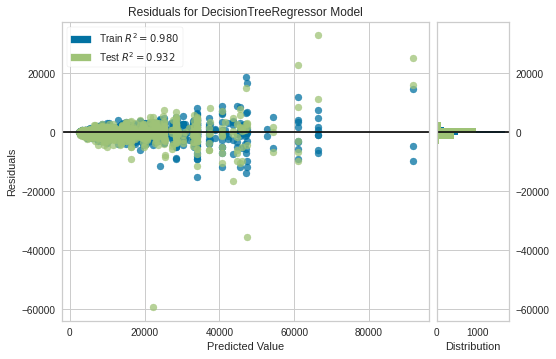

In [18]:
plot_model(tuned_dt)

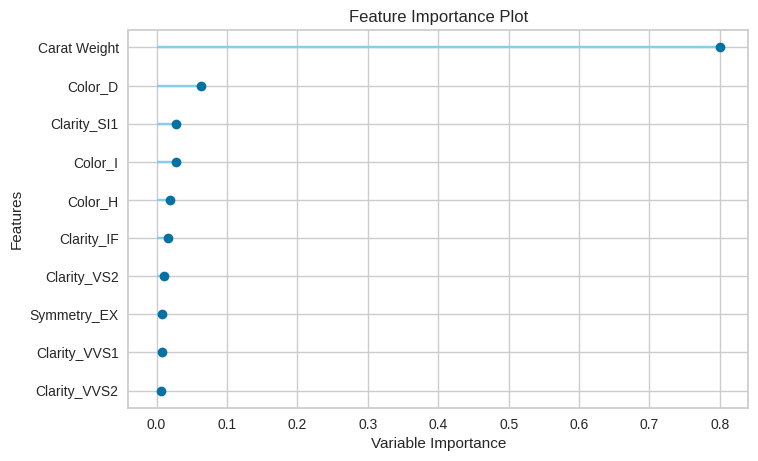

In [19]:
plot_model(tuned_dt, plot='feature')